<a href="https://colab.research.google.com/github/kslote1/Data-Driven-Dynamics/blob/main/chapter_one/randomized_singular_value_decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Spider man](https://raw.githubusercontent.com/kslote1/Data-Driven-Dynamics/main/chapter_one/figs/png-transparent-spider-man-heroes-download-with-transparent-background-free-thumbnail.png)

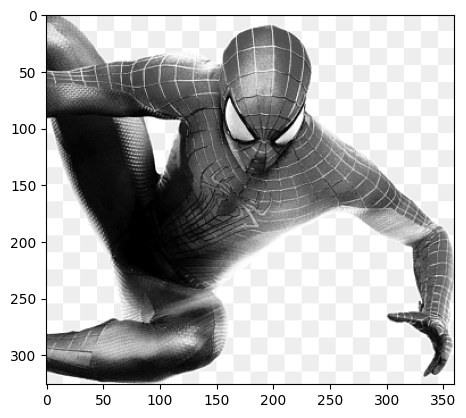

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
import requests
from io import BytesIO


url = "https://raw.githubusercontent.com/kslote1/Data-Driven-Dynamics/main/chapter_one/figs/png-transparent-spider-man-heroes-download-with-transparent-background-free-thumbnail.png"

# Fetch the image
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = imread(BytesIO(response.content))

# Convert the image to a NumPy array
img_np = np.array(img)
img_np = np.mean(img_np, axis=2)
plt.imshow(img_np, cmap='gray')

In [14]:
# Define randomized SVD function
def rSVD(X,r,q,p):
    # Step 1: Sample column space of X with P matrix
    ny = X.shape[1]
    P = np.random.randn(ny,r+p)
    Z = X @ P
    for k in range(q):
        Z = X @ (X.T @ Z)

    Q, R = np.linalg.qr(Z,mode='reduced')

    # Step 2: Compute SVD on projected Y = Q.T @ X
    Y = Q.T @ X
    UY, S, VT = np.linalg.svd(Y,full_matrices=0)
    U = Q @ UY

    return U, S, VT

X = img_np

U, S, VT = np.linalg.svd(X,full_matrices=0) # Deterministic SVD

r = 400 # Target rank
q = 1   # Power iterations
p = 5   # Oversampling parameter

rU, rS, rVT = rSVD(X,r,q,p)

## Reconstruction
XSVD = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:] # SVD approximation
errSVD = np.linalg.norm(X-XSVD,ord=2) / np.linalg.norm(X,ord=2)

XrSVD = rU[:,:(r+1)] @ np.diag(rS[:(r+1)]) @ rVT[:(r+1),:] # SVD approximation
errSVD = np.linalg.norm(X-XrSVD,ord=2) / np.linalg.norm(X,ord=2)

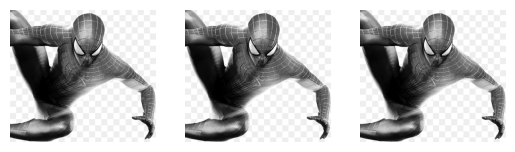

In [15]:
## Plot
fig, axs = plt.subplots(1,3)

plt.set_cmap('gray')
axs[0].imshow(X)
axs[0].axis('off')
axs[1].imshow(XSVD)
axs[1].axis('off')
axs[2].imshow(XrSVD)
axs[2].axis('off')

plt.show()

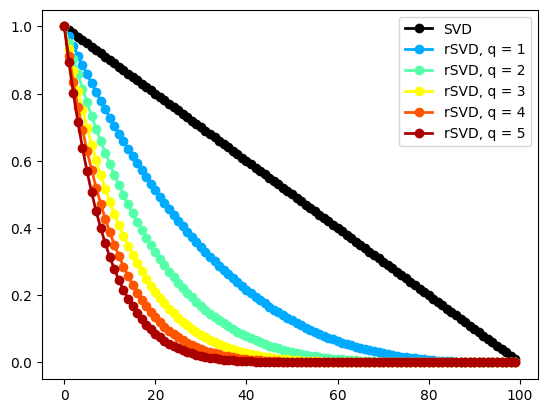

In [16]:
## Illustrate power iterations
X = np.random.randn(1000,100)
U, S, VT = np.linalg.svd(X,full_matrices=0)
S = np.arange(1,0,-0.01)
X = U @ np.diag(S) @ VT

color_list = np.array([[0,0,2/3],  # Define color map
                 [0,0,1],
                 [0,1/3,1],
                 [0,2/3,1],
                 [0,1,1],
                 [1/3,1,2/3],
                 [2/3,1,1/3],
                 [1,1,0],
                 [1,2/3,0],
                 [1,1/3,0],
                 [1,0,0],
                 [2/3,0,0]])

plt.plot(S,'o-',color='k',linewidth=2,label='SVD')

Y = X
for q in range(1,6):
    Y = X.T @ Y
    Y = X @ Y
    Uq, Sq, VTq = np.linalg.svd(Y,full_matrices=0)
    plt.plot(Sq,'-o',color=tuple(color_list[2*q+1]),linewidth=2,label='rSVD, q = '+str(q))

plt.legend()
plt.show()